## Case TON - Análise técnica dos dados
##### Fernando Fincatti
---

## Imports
---

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime
from utils import*

In [2]:
df_cases = pd.read_csv("cases.csv") #importa arquivo cases
df_creds = pd.read_csv("creds.csv") #importa arquivo creds

In [3]:
df_creds.head(2)

,Unnamed: 0,cred_date,shipping_address_city,shipping_address_state,max_machine,accountid
0,0,2020-04-18,Feira de Santana,BA,T1,NaN
1,1,2020-10-16,Bacuri,MA,T1,NaN


In [4]:
df_creds.columns

Index(['Unnamed: 0', 'cred_date', 'shipping_address_city',
       'shipping_address_state', 'max_machine', 'accountid'],
      dtype='object')

In [5]:
df_cases.head(2)

,Unnamed: 0,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,Id
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_cases.columns

Index(['Unnamed: 0', 'accountid', 'date_ref', 'channelid', 'waitingtime',
       'missed', 'pesquisa_de_satisfa_o__c', 'assunto', 'Id'],
      dtype='object')

In [7]:
#filtra somente para os chamados que possuem data registrada
df_cases = df_cases.dropna(subset=['date_ref'])
df_creds = df_creds.dropna(subset=['cred_date']) 

In [8]:
#transforma dados para datetime
df_cases["date_ref"] = df_cases['date_ref'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d")) 

#cria coluna ano, mês e dia
df_cases["mes"] = df_cases['date_ref'].apply(lambda x: x.month) 
df_cases["dia"] = df_cases['date_ref'].apply(lambda x: x.day) 

In [9]:
#transforma dados para datetime
df_creds["cred_date"] = df_creds['cred_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d")) 

#cria coluna ano, mês e dia
df_creds["mes"] = df_creds['cred_date'].apply(lambda x: x.month) 
df_creds["dia"] = df_creds['cred_date'].apply(lambda x: x.day) 

## Questão 1.
---

In [10]:
df_cases_q1 = df_cases.copy()

In [11]:
#coluna que serve apenas para contagem de chamados
df_cases_q1["count"] = 1

#tabela com a somatória de chamados para todo o período
table_q1 = df_cases_q1[["mes", "count"]].groupby(['mes']).sum()

#tabela com a somatória de chamados para o período antes da implementação
table_q1_tendencia = df_cases_q1.loc[df_cases_q1["mes"] < 8][["mes", "count"]].groupby(['mes']).count()

In [12]:
z = np.polyfit(table_q1_tendencia.index.tolist(), table_q1_tendencia["count"].tolist(), 2)
function = np.poly1d(z)

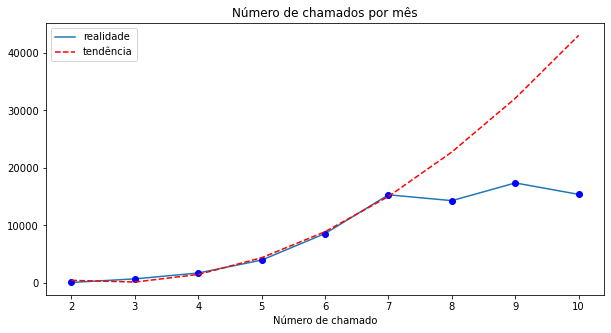

In [13]:
plt.figure(figsize=(10,5))
plt.title("Número de chamados por mês")
plt.xlabel("Número de chamado")
plt.plot(table_q1, label="realidade") #plota curva dos dados
plt.plot(table_q1, 'bo') #cria pontos
plt.plot(table_q1.index.tolist(), function(table_q1.index.tolist()),"r--", label="tendência") #realiza previsão
plt.legend()
plt.show()

Com base no gráfco acima, podemos ver que o número de chamados vinha aumentando exponencialmente, após a implementação no dia 
primeiro de agosto, o volume de chamados caiu drasticamente, quebrando completamente a tendência de crescimento do gráfico. Portanto podemos concluir que a implementação foi um sucesso!

## Questão 2.
---

In [14]:
#filtra somente os cliente possíveis de serem indentificados
df_cases_q2 = df_cases.dropna(subset=["accountid"]) 
df_creds_q2 = df_creds.dropna(subset=["accountid"])

In [15]:
#junta os dois datasets, somente aqueles que estão credenciados
df_merged = pd.merge(df_cases_q2, df_creds_q2, on='accountid', how='inner')

In [16]:
#calcula distância em dias do dia de credenciamento
df_merged["time_distance"] = df_merged.apply(lambda x: (x["cred_date"] - x["date_ref"]).days, axis=1)

In [17]:
#coluna de contagem
df_merged["count"] = 1

In [23]:
lista_ids = df_merged.accountid.unique().tolist() #pega todos os id unicos
lista_media_mes_seguinte = []
lista_media_meses_anteriores = []
counter = 0 #progesso
for id_ in lista_ids:
    counter += 1
    
    response = get_5months_before(id_, df_merged) #pega chamados
    
    #armazena as médias de chamadas do mes seguinte ao cred para todos os clientes
    lista_media_mes_seguinte.append(response[1])
    
    #armazena as médias de chamadas dos meses ateriores ao cred para todos os clientes
    lista_media_meses_anteriores.append(response[0])   
    
    progresso = round(counter*100/len(lista_ids) , 2)
    print("{:,} | {:,} > {}%".format(counter, len(lista_ids), progresso), end = "\r")
    
    if(counter % 1000 == 0):
        print()
        print(lista_media_mes_seguinte[-1])
        print(lista_media_meses_anteriores[-1])
        print("------------")        

1,000 | 31,429 > 3.18%
3
0
------------
2,000 | 31,429 > 6.36%
1
0
------------
3,000 | 31,429 > 9.55%
1
0
------------
4,000 | 31,429 > 12.73%
9
0
------------
5,000 | 31,429 > 15.91%
16
0
------------
6,000 | 31,429 > 19.09%
16
0
------------
7,000 | 31,429 > 22.27%
5
0
------------
8,000 | 31,429 > 25.45%
1
0
------------
9,000 | 31,429 > 28.64%
16
0
------------
10,000 | 31,429 > 31.82%
4
0
------------
11,000 | 31,429 > 35.0%%
1
0
------------
12,000 | 31,429 > 38.18%
0
0
------------
13,000 | 31,429 > 41.36%
4
0
------------
14,000 | 31,429 > 44.54%
1
0
------------
15,000 | 31,429 > 47.73%
0
0
------------
16,000 | 31,429 > 50.91%
0
0
------------
17,000 | 31,429 > 54.09%
6
0
------------
18,000 | 31,429 > 57.27%
9
0
------------
19,000 | 31,429 > 60.45%
4
0
------------
20,000 | 31,429 > 63.64%
9
0
------------
21,000 | 31,429 > 66.82%
1
0
------------
22,000 | 31,429 > 70.0%%
0
9
------------
23,000 | 31,429 > 73.18%
6
0
------------
24,000 | 31,429 > 76.36%
1
0
------------
2

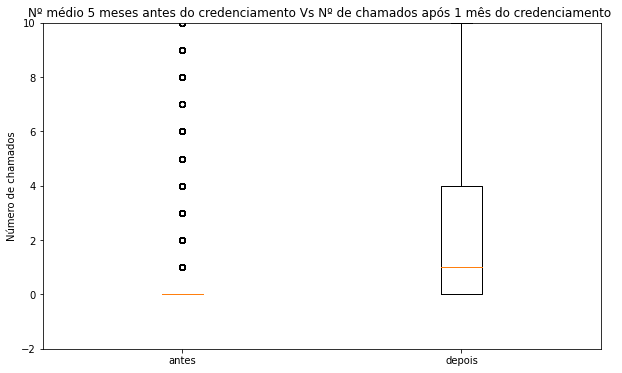

In [24]:
plt.figure(figsize=(10,6))
plt.boxplot([lista_media_meses_anteriores, lista_media_mes_seguinte], labels=['antes', 'depois'])
plt.title("Nº médio 5 meses antes do credenciamento Vs Nº de chamados após 1 mês do credenciamento ")
plt.ylim(-2, 10)
plt.ylabel("Número de chamados")
plt.show()

Como é possível observar no boxplot acima, a concetração de número médios de chamados 5 meses antes do credenciamento é muito menor quando comparado ao mês seguinte ao mesmo. Portanto, podemos concluir que o número de chamados logo após a data do credenciamento do aumenta consideravelmente!

In [25]:
md_antes = sum(lista_media_meses_anteriores) / len(lista_media_meses_anteriores)
md_depois= sum(lista_media_mes_seguinte) / len(lista_media_mes_seguinte)

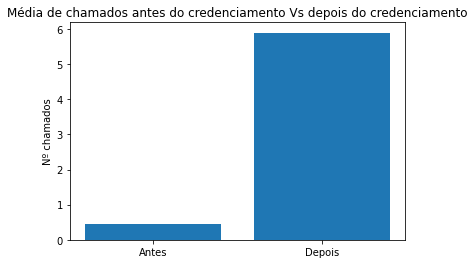

Após o credenciamento, o aumento no número médio de chamados é de: 12.72 vezes


In [35]:
plt.title("Média de chamados antes do credenciamento Vs depois do credenciamento")
plt.bar(['Antes', 'Depois'], [md_antes, md_depois])
plt.ylabel("Nº chamados")
plt.show()

print("Após o credenciamento, o aumento no número médio de chamados é de: {0} vezes".format(round(md_depois/md_antes, 2)))

Como é possí